In [11]:
print("Hello General Relativity")

Hello General Relativity


# Equations--
1) $ds^{2}$ = $-dt^{2}$ + $dR^{2}$ + $R^{2} sin^{2}(\theta)  d\theta^{2}$ + $R^{2} d\phi^{2}$

2) $ds^{2}$ = $-dt^{2}$ + $a(t)^{2}dr^{2}$ + $a(t)^{2} r^{2} sin^{2}(\theta)  d\theta^{2}$ + $a(t)^{2} r^{2} d\phi^{2}$

### Here in the assignment I am given with two metric tensor for which i have to calculate all the other tensors:   
__1} MetricTensor ($g_{\mu\nu}$)   
2} Christoffel Symbols ($\Gamma^{\lambda}_{\mu\nu}$)      
3} Riemann Curvature Tensor ($R^{\lambda}_{\mu\nu\gamma}$)    
4} Ricci Tensor ($R_{\mu\nu}$)  
5} Ricci Scalar ($R$)   
6} Einstein Tensor ($G_{\mu\nu}$)__  
__7} Stress Energy Momentum Tensor ($T_{\mu\nu}$)__

In [12]:
import einsteinpy as ep
import sympy as smp
smp.init_printing()  # enables the best printing available in an environment

In [13]:
from einsteinpy.symbolic.constants import G

In [14]:
G

In [15]:
 einsteinpy.symbolic.constants?

Object `einsteinpy.symbolic.constants` not found.


In [16]:
from einsteinpy.symbolic.constants import Cosmo_Const

In [17]:
Cosmo_Const

In [18]:
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols,\
RiemannCurvatureTensor,EinsteinTensor,RicciScalar,RicciTensor,StressEnergyMomentumTensor

# Metric Tensor ($g_{\mu\nu}$)

# 3x3 Tensor

In [19]:
# Defining the metric tensor for 3d spherical coordinates
syms = smp.symbols('R theta phi')
# define the metric for 3d spherical coordinates
metric = [[0 for i in range(3)] for i in range(3)]
metric[0][0] = 1                                         # g_00
metric[1][1] = (syms[0]**2)*(smp.sin(syms[1])**2)        # g_11
metric[2][2] = syms[0]**2                                # g_22
# creating metric object
metric_13 = MetricTensor(metric, syms)
metric_13.tensor()

⎡1      0       0 ⎤
⎢                 ⎥
⎢    2    2       ⎥
⎢0  R ⋅sin (θ)  0 ⎥
⎢                 ⎥
⎢                2⎥
⎣0      0       R ⎦

In [20]:
from itertools import product
from IPython.display import display, Math
from sympy import symbols, latex, lambdify, Matrix
for  j, k in product(range(3), range(3)):
    if metric_13[j, k] != 0:
        display(Math(f'g_{{{j}{k}}} = ' + latex(metric_13[j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Christoffel Symbols ( $\Gamma^{\lambda}_{\mu\nu}$ )

In [21]:
ch_13 = ChristoffelSymbols.from_metric(metric_13)    # Gamma - Christoffel Symbols
ch_13.tensor()

⎡                     ⎡     1      ⎤  ⎡      1⎤⎤
⎢⎡0      0       0 ⎤  ⎢0    ─     0⎥  ⎢0  0  ─⎥⎥
⎢⎢                 ⎥  ⎢     R      ⎥  ⎢      R⎥⎥
⎢⎢         2       ⎥  ⎢            ⎥  ⎢       ⎥⎥
⎢⎢0  -R⋅sin (θ)  0 ⎥  ⎢1  cos(θ)   ⎥  ⎢0  0  0⎥⎥
⎢⎢                 ⎥  ⎢─  ──────  0⎥  ⎢       ⎥⎥
⎢⎣0      0       -R⎦  ⎢R  sin(θ)   ⎥  ⎢1      ⎥⎥
⎢                     ⎢            ⎥  ⎢─  0  0⎥⎥
⎣                     ⎣0    0     0⎦  ⎣R      ⎦⎦

In [22]:
for i, j, k in product(range(3), range(3), range(3)):
    if ch_13[i, j, k] != 0:
        display(Math(f'\Gamma^{i}_{{{j}{k}}} = ' + latex(ch_13[i, j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
ch_13.tensor()[1,2,2]   # we can access the individual as shown

# Riemann Tensor ($R^{\lambda}_{\mu\nu\gamma}$)

In [24]:
# Calculating Riemann Tensor from Christoffel Symbols
rm_13 = RiemannCurvatureTensor.from_christoffels(ch_13)
rm_13.tensor()

⎡⎡0  0  0⎤        ⎡0  0  0⎤         ⎡0  0  0⎤ ⎤
⎢⎢       ⎥        ⎢       ⎥         ⎢       ⎥ ⎥
⎢⎢0  0  0⎥        ⎢0  0  0⎥         ⎢0  0  0⎥ ⎥
⎢⎢       ⎥        ⎢       ⎥         ⎢       ⎥ ⎥
⎢⎣0  0  0⎦        ⎣0  0  0⎦         ⎣0  0  0⎦ ⎥
⎢                                             ⎥
⎢⎡0  0  0⎤        ⎡0  0  0⎤         ⎡0  0  0 ⎤⎥
⎢⎢       ⎥        ⎢       ⎥         ⎢        ⎥⎥
⎢⎢0  0  0⎥        ⎢0  0  0⎥         ⎢0  0  -1⎥⎥
⎢⎢       ⎥        ⎢       ⎥         ⎢        ⎥⎥
⎢⎣0  0  0⎦        ⎣0  0  0⎦         ⎣0  1  0 ⎦⎥
⎢                                             ⎥
⎢           ⎡0     0         0   ⎤            ⎥
⎢⎡0  0  0⎤  ⎢                    ⎥  ⎡0  0  0⎤ ⎥
⎢⎢       ⎥  ⎢                2   ⎥  ⎢       ⎥ ⎥
⎢⎢0  0  0⎥  ⎢0     0      sin (θ)⎥  ⎢0  0  0⎥ ⎥
⎢⎢       ⎥  ⎢                    ⎥  ⎢       ⎥ ⎥
⎢⎣0  0  0⎦  ⎢       2            ⎥  ⎣0  0  0⎦ ⎥
⎣           ⎣0  -sin (θ)     0   ⎦            ⎦

In [25]:
for i, j, k, p in product(range(3), range(3), range(3),range(3)):
    if rm_13[i, j, k, p] != 0:
        display(Math(f'R^{i}_{{{j}{k}{p}}} = ' + latex(rm_13[i, j, k,p])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
# 2nd method, Calculating Riemann Tensor from Metric Tensor
rm_13 = RiemannCurvatureTensor.from_metric(metric_13)
rm_13.tensor()

⎡⎡0  0  0⎤        ⎡0  0  0⎤         ⎡0  0  0⎤ ⎤
⎢⎢       ⎥        ⎢       ⎥         ⎢       ⎥ ⎥
⎢⎢0  0  0⎥        ⎢0  0  0⎥         ⎢0  0  0⎥ ⎥
⎢⎢       ⎥        ⎢       ⎥         ⎢       ⎥ ⎥
⎢⎣0  0  0⎦        ⎣0  0  0⎦         ⎣0  0  0⎦ ⎥
⎢                                             ⎥
⎢⎡0  0  0⎤        ⎡0  0  0⎤         ⎡0  0  0 ⎤⎥
⎢⎢       ⎥        ⎢       ⎥         ⎢        ⎥⎥
⎢⎢0  0  0⎥        ⎢0  0  0⎥         ⎢0  0  -1⎥⎥
⎢⎢       ⎥        ⎢       ⎥         ⎢        ⎥⎥
⎢⎣0  0  0⎦        ⎣0  0  0⎦         ⎣0  1  0 ⎦⎥
⎢                                             ⎥
⎢           ⎡0     0         0   ⎤            ⎥
⎢⎡0  0  0⎤  ⎢                    ⎥  ⎡0  0  0⎤ ⎥
⎢⎢       ⎥  ⎢                2   ⎥  ⎢       ⎥ ⎥
⎢⎢0  0  0⎥  ⎢0     0      sin (θ)⎥  ⎢0  0  0⎥ ⎥
⎢⎢       ⎥  ⎢                    ⎥  ⎢       ⎥ ⎥
⎢⎣0  0  0⎦  ⎢       2            ⎥  ⎣0  0  0⎦ ⎥
⎣           ⎣0  -sin (θ)     0   ⎦            ⎦

# Ricci Tensor ($R_{\mu\nu}$)  

In [27]:
R_tensor_13 = RicciTensor.from_metric(metric_13)
R_tensor_13.tensor()

⎡0     0      0 ⎤
⎢               ⎥
⎢       2       ⎥
⎢0  -sin (θ)  0 ⎥
⎢               ⎥
⎣0     0      -1⎦

In [28]:
for i, j in product(range(3), range(3)):
    if R_tensor_13[i, j] != 0:
        display(Math(f'R_{{{i}{j}}} = ' + latex(R_tensor_13[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Ricci Scalar ($R$)

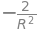

In [29]:
R_scalar_13 = RicciScalar.from_metric(metric_13)
R_scalar_13.simplify()
R_scalar_13.expr

# EinsteinTensor ($G_{\mu\nu}$)

In [30]:
einst_13 = EinsteinTensor.from_metric(metric_13) 
einst_13.tensor()

⎡1.0      ⎤
⎢───  0  0⎥
⎢  2      ⎥
⎢ R       ⎥
⎢         ⎥
⎢ 0   0  0⎥
⎢         ⎥
⎣ 0   0  0⎦

In [31]:
for i, j in product(range(3), range(3)):
    if einst_13[i, j] != 0:
        display(Math(f'G_{{{i}{j}}} = ' + latex(einst_13[i, j])))

<IPython.core.display.Math object>

# Stress Energy Momentum Tensor ($T_{\mu\nu}$)

In [32]:
T_13 = StressEnergyMomentumTensor.from_metric(metric_13)
T_13.tensor()

⎡                    4 ⎛     1.0⎞                                             
⎢0.0397887357729738⋅c ⋅⎜-Λ + ───⎟                                             
⎢                      ⎜       2⎟                                             
⎢                      ⎝      R ⎠                                             
⎢────────────────────────────────                   0                         
⎢               G                                                             
⎢                                                                             
⎢                                                       2    4    2           
⎢                                  -0.0397887357729738⋅R ⋅Λ⋅c ⋅sin (θ)        
⎢               0                  ────────────────────────────────────       
⎢                                                   G                         
⎢                                                                             
⎢                                                   

In [33]:
for i, j in product(range(3), range(3)):
    if T_13[i, j] != 0:
        display(Math(f'T_{{{i}{j}}} = ' + latex(T_13[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 4x4 Tensor

In [34]:
# Defining the metric tensor for 3d spherical coordinates
syms = smp.symbols('t R theta phi')
# define the metric for 3d spherical coordinates
metric = [[0 for i in range(4)] for i in range(4)]
metric[0][0] = -1
metric[1][1] = 1
metric[2][2] = (syms[1]**2)*(smp.sin(syms[2])**2)
metric[3][3] = syms[1]**2
# creating metric object
metric_14 = MetricTensor(metric, syms)
metric_14.tensor()

⎡-1  0      0       0 ⎤
⎢                     ⎥
⎢0   1      0       0 ⎥
⎢                     ⎥
⎢        2    2       ⎥
⎢0   0  R ⋅sin (θ)  0 ⎥
⎢                     ⎥
⎢                    2⎥
⎣0   0      0       R ⎦

In [35]:
for  j, k in product(range(4), range(4)):
    if metric_14[j, k] != 0:
        display(Math(f'g_{{{j}{k}}} = ' + latex(metric_14[j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Christoffel Symbols ( $\Gamma^{\lambda}_{\mu\nu}$ )

In [36]:
ch_14 = ChristoffelSymbols.from_metric(metric_14)
ch_14.tensor()

⎡                                      ⎡0  0    0     0⎤  ⎡0  0  0  0⎤⎤
⎢              ⎡0  0      0       0 ⎤  ⎢               ⎥  ⎢          ⎥⎥
⎢⎡0  0  0  0⎤  ⎢                    ⎥  ⎢        1      ⎥  ⎢         1⎥⎥
⎢⎢          ⎥  ⎢0  0      0       0 ⎥  ⎢0  0    ─     0⎥  ⎢0  0  0  ─⎥⎥
⎢⎢0  0  0  0⎥  ⎢                    ⎥  ⎢        R      ⎥  ⎢         R⎥⎥
⎢⎢          ⎥  ⎢            2       ⎥  ⎢               ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  -R⋅sin (θ)  0 ⎥  ⎢   1  cos(θ)   ⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢                    ⎥  ⎢0  ─  ──────  0⎥  ⎢          ⎥⎥
⎢⎣0  0  0  0⎦  ⎣0  0      0       -R⎦  ⎢   R  sin(θ)   ⎥  ⎢   1      ⎥⎥
⎢                                      ⎢               ⎥  ⎢0  ─  0  0⎥⎥
⎣                                      ⎣0  0    0     0⎦  ⎣   R      ⎦⎦

In [37]:
for i, j, k in product(range(4), range(4), range(4)):
    if ch_14[i, j, k] != 0:
        display(Math(f'\Gamma^{i}_{{{j},{k}}} = ' + latex(ch_14[i, j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Riemann Tensor ($R^{\lambda}_{\mu\nu\gamma}$)

In [38]:
# Calculating Riemann Tensor from Christoffel Symbols
rm_14 = RiemannCurvatureTensor.from_metric(metric_14)
rm_14.tensor()

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤        ⎡0  0  0  0⎤         ⎡0  0  0  0⎤ ⎤
⎢⎢          ⎥  ⎢          ⎥        ⎢          ⎥         ⎢          ⎥ ⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥        ⎢0  0  0  0⎥         ⎢0  0  0  0⎥ ⎥
⎢⎢          ⎥  ⎢          ⎥        ⎢          ⎥         ⎢          ⎥ ⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥        ⎢0  0  0  0⎥         ⎢0  0  0  0⎥ ⎥
⎢⎢          ⎥  ⎢          ⎥        ⎢          ⎥         ⎢          ⎥ ⎥
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦        ⎣0  0  0  0⎦         ⎣0  0  0  0⎦ ⎥
⎢                                                                    ⎥
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤        ⎡0  0  0  0⎤         ⎡0  0  0  0⎤ ⎥
⎢⎢          ⎥  ⎢          ⎥        ⎢          ⎥         ⎢          ⎥ ⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥        ⎢0  0  0  0⎥         ⎢0  0  0  0⎥ ⎥
⎢⎢          ⎥  ⎢          ⎥        ⎢          ⎥         ⎢          ⎥ ⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥        ⎢0  0  0  0⎥         ⎢0  0  0  0⎥ ⎥
⎢⎢          ⎥  ⎢          ⎥        ⎢          ⎥         ⎢          ⎥ ⎥
⎢⎣0  0

In [39]:
for i, j, k, p in product(range(4), range(4), range(4),range(4)):
    if rm_14[i, j, k, p] != 0:
        display(Math(f'R^{i}_{{{j}{k}{p}}} = ' + latex(rm_14[i, j, k,p])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Ricci Tensor ($R_{\mu\nu}$)  

In [40]:
R_tensor_14 = RicciTensor.from_metric(metric_14)
R_tensor_14.tensor()

⎡0  0     0      0 ⎤
⎢                  ⎥
⎢0  0     0      0 ⎥
⎢                  ⎥
⎢          2       ⎥
⎢0  0  -sin (θ)  0 ⎥
⎢                  ⎥
⎣0  0     0      -1⎦

In [41]:
for i, j in product(range(4), range(4)):
    if R_tensor_14[i, j] != 0:
        display(Math(f'R_{{{i}{j}}} = ' + latex(R_tensor_14[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Ricci Scalar ($R$)

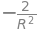

In [42]:
R_scalar_14 = RicciScalar.from_metric(metric_14)
R_scalar_14.simplify()
R_scalar_14.expr

# EinsteinTensor ($G_{\mu\nu}$)

In [43]:
einst_14 = EinsteinTensor.from_metric(metric_14)
einst_14.tensor()

⎡-1.0            ⎤
⎢─────   0   0  0⎥
⎢   2            ⎥
⎢  R             ⎥
⎢                ⎥
⎢       1.0      ⎥
⎢  0    ───  0  0⎥
⎢         2      ⎥
⎢        R       ⎥
⎢                ⎥
⎢  0     0   0  0⎥
⎢                ⎥
⎣  0     0   0  0⎦

In [44]:
for i, j in product(range(4), range(4)):
    if einst_14[i, j] != 0:
        display(Math(f'G_{{{i}{j}}} = ' + latex(einst_14[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Stress Energy Momentum Tensor ($T_{\mu\nu}$)

In [45]:
T_14 = StressEnergyMomentumTensor.from_metric(metric_14)
T_14.tensor()

⎡                    4 ⎛    1 ⎞                                               
⎢0.0397887357729738⋅c ⋅⎜Λ - ──⎟                                               
⎢                      ⎜     2⎟                                               
⎢                      ⎝    R ⎠                                               
⎢──────────────────────────────                 0                             
⎢              G                                                              
⎢                                                                             
⎢                                                    4 ⎛     1.0⎞             
⎢                                0.0397887357729738⋅c ⋅⎜-Λ + ───⎟             
⎢                                                      ⎜       2⎟             
⎢                                                      ⎝      R ⎠             
⎢              0                 ────────────────────────────────             
⎢                                               G   

In [46]:
for i, j in product(range(4), range(4)):
    if T_14[i, j] != 0:
        display(Math(f'T_{{{i}{j}}} = ' + latex(T_14[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# #2
# Metric Tensor ($g_{\mu\nu}$)

# 3x3 Matrix

In [47]:
# Defining the metric tensor for 3d spherical coordinates
syms = smp.symbols('r theta phi ')
t = smp.symbols('t')
a = smp.Function("a")
# define the metric for 3d spherical coordinates
metric = [[0 for i in range(3)] for i in range(3)]
metric[0][0] = a(t)**2
metric[2][2] = syms[0]**2 *  a(t)**2
metric[1][1] = (syms[0]**2)*(smp.sin(syms[1])**2) * a(t)**2
# creating metric object
metric_23 = MetricTensor(metric, syms)
metric_23.tensor()

⎡ 2                               ⎤
⎢a (t)         0             0    ⎥
⎢                                 ⎥
⎢        2  2       2             ⎥
⎢  0    r ⋅a (t)⋅sin (θ)     0    ⎥
⎢                                 ⎥
⎢                          2  2   ⎥
⎣  0           0          r ⋅a (t)⎦

In [48]:
for  j, k in product(range(3), range(3)):
    if metric_23[j, k] != 0:
        display(Math(f'g_{{{j}{k}}} = ' + latex(metric_23[j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Christoffel Symbols ( $\Gamma^{\lambda}_{\mu\nu}$ )

In [49]:
ch_23 = ChristoffelSymbols.from_metric(metric_23)
ch_23.tensor()

⎡                     ⎡     1      ⎤  ⎡      1⎤⎤
⎢⎡0      0       0 ⎤  ⎢0    ─     0⎥  ⎢0  0  ─⎥⎥
⎢⎢                 ⎥  ⎢     r      ⎥  ⎢      r⎥⎥
⎢⎢         2       ⎥  ⎢            ⎥  ⎢       ⎥⎥
⎢⎢0  -r⋅sin (θ)  0 ⎥  ⎢1  cos(θ)   ⎥  ⎢0  0  0⎥⎥
⎢⎢                 ⎥  ⎢─  ──────  0⎥  ⎢       ⎥⎥
⎢⎣0      0       -r⎦  ⎢r  sin(θ)   ⎥  ⎢1      ⎥⎥
⎢                     ⎢            ⎥  ⎢─  0  0⎥⎥
⎣                     ⎣0    0     0⎦  ⎣r      ⎦⎦

In [50]:
for i, j, k in product(range(3), range(3), range(3)):
    if ch_23[i, j, k] != 0:
        display(Math(f'\Gamma^{i}_{{{j},{k}}} = ' + latex(ch_23[i, j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Riemann Tensor ($R^{\lambda}_{\mu\nu\gamma}$)

In [51]:
# Calculating Riemann Tensor from Christoffel Symbols
rm_23 = RiemannCurvatureTensor.from_christoffels(ch_23)
rm_23.tensor()

⎡⎡0  0  0⎤        ⎡0  0  0⎤         ⎡0  0  0⎤ ⎤
⎢⎢       ⎥        ⎢       ⎥         ⎢       ⎥ ⎥
⎢⎢0  0  0⎥        ⎢0  0  0⎥         ⎢0  0  0⎥ ⎥
⎢⎢       ⎥        ⎢       ⎥         ⎢       ⎥ ⎥
⎢⎣0  0  0⎦        ⎣0  0  0⎦         ⎣0  0  0⎦ ⎥
⎢                                             ⎥
⎢⎡0  0  0⎤        ⎡0  0  0⎤         ⎡0  0  0 ⎤⎥
⎢⎢       ⎥        ⎢       ⎥         ⎢        ⎥⎥
⎢⎢0  0  0⎥        ⎢0  0  0⎥         ⎢0  0  -1⎥⎥
⎢⎢       ⎥        ⎢       ⎥         ⎢        ⎥⎥
⎢⎣0  0  0⎦        ⎣0  0  0⎦         ⎣0  1  0 ⎦⎥
⎢                                             ⎥
⎢           ⎡0     0         0   ⎤            ⎥
⎢⎡0  0  0⎤  ⎢                    ⎥  ⎡0  0  0⎤ ⎥
⎢⎢       ⎥  ⎢                2   ⎥  ⎢       ⎥ ⎥
⎢⎢0  0  0⎥  ⎢0     0      sin (θ)⎥  ⎢0  0  0⎥ ⎥
⎢⎢       ⎥  ⎢                    ⎥  ⎢       ⎥ ⎥
⎢⎣0  0  0⎦  ⎢       2            ⎥  ⎣0  0  0⎦ ⎥
⎣           ⎣0  -sin (θ)     0   ⎦            ⎦

In [52]:
for i, j, k, p in product(range(3), range(3), range(3),range(3)):
    if rm_23[i, j, k, p] != 0:
        display(Math(f'R^{i}_{{{j}{k}{p}}} = ' + latex(rm_23[i, j, k,p])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Ricci Tensor ($R_{\mu\nu}$)  

In [53]:
R_tensor_23 = RicciTensor.from_metric(metric_23)
R_tensor_23.tensor()

⎡0     0      0 ⎤
⎢               ⎥
⎢       2       ⎥
⎢0  -sin (θ)  0 ⎥
⎢               ⎥
⎣0     0      -1⎦

In [54]:
for i, j in product(range(3), range(3)):
    if R_tensor_23[i, j] != 0:
        display(Math(f'R_{{{i}{j}}} = ' + latex(R_tensor_23[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Ricci Scalar ($R$)

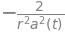

In [55]:
R_scalar_23 = RicciScalar.from_metric(metric_23)
R_scalar_23.simplify()
R_scalar_23.expr

# EinsteinTensor ($G_{\mu\nu}$)

In [56]:
einst_23 = EinsteinTensor.from_metric(metric_23)
einst_23.tensor()

⎡1.0      ⎤
⎢───  0  0⎥
⎢  2      ⎥
⎢ r       ⎥
⎢         ⎥
⎢ 0   0  0⎥
⎢         ⎥
⎣ 0   0  0⎦

In [57]:
for i, j in product(range(3), range(3)):
    if einst_23[i, j] != 0:
        display(Math(f'G_{{{i}{j}}} = ' + latex(einst_23[i, j])))

<IPython.core.display.Math object>

# Stress Energy Momentum Tensor ($T_{\mu\nu}$)

In [58]:
T_23 = StressEnergyMomentumTensor.from_metric(metric_23)
T_23.tensor()

⎡                    4 ⎛     2      1.0⎞                                      
⎢0.0397887357729738⋅c ⋅⎜- Λ⋅a (t) + ───⎟                                      
⎢                      ⎜              2⎟                                      
⎢                      ⎝             r ⎠                                      
⎢───────────────────────────────────────                      0               
⎢                   G                                                         
⎢                                                                             
⎢                                                              2    4  2      
⎢                                         -0.0397887357729738⋅r ⋅Λ⋅c ⋅a (t)⋅si
⎢                   0                     ────────────────────────────────────
⎢                                                             G               
⎢                                                                             
⎢                                                   

In [59]:
for i, j in product(range(3), range(3)):
    if T_23[i, j] != 0:
        display(Math(f'T_{{{i}{j}}} = ' + latex(T_23[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Metric Tensor ($g_{\mu\nu}$)

# 4x4 Matrix

In [60]:
syms = smp.symbols("t r theta phi")
G, M, c = smp.symbols("G M c")
a = smp.Function("a")
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -1 
list2d[1][1] = a(t)**2
list2d[2][2] = (syms[1]**2)*(smp.sin(syms[3])**2) * a(t)**2
list2d[3][3] = (syms[1]**2) *  a(t)**2
metric_24 = MetricTensor(list2d, syms)
metric_24.tensor()

⎡-1    0           0             0    ⎤
⎢                                     ⎥
⎢     2                               ⎥
⎢0   a (t)         0             0    ⎥
⎢                                     ⎥
⎢            2  2       2             ⎥
⎢0     0    r ⋅a (t)⋅sin (φ)     0    ⎥
⎢                                     ⎥
⎢                              2  2   ⎥
⎣0     0           0          r ⋅a (t)⎦

In [61]:
for  j, k in product(range(4), range(4)):
    if metric_24[j, k] != 0:
        display(Math(f'g_{{{j}{k}}} = ' + latex(metric_24[j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Christoffel Symbols ( $\Gamma^{\lambda}_{\mu\nu}$ )

In [62]:
ch_24 = ChristoffelSymbols.from_metric(metric_24)
ch_24.tensor()

⎡                                                                             
⎢                                                                ⎡          d 
⎢                                                                ⎢          ──
⎢⎡0        0                   0                     0        ⎤  ⎢          dt
⎢⎢                                                            ⎥  ⎢   0      ──
⎢⎢        d                                                   ⎥  ⎢            
⎢⎢0  a(t)⋅──(a(t))             0                     0        ⎥  ⎢            
⎢⎢        dt                                                  ⎥  ⎢d           
⎢⎢                                                            ⎥  ⎢──(a(t))    
⎢⎢                   2         2    d                         ⎥  ⎢dt          
⎢⎢0        0        r ⋅a(t)⋅sin (φ)⋅──(a(t))         0        ⎥  ⎢────────    
⎢⎢                                  dt                        ⎥  ⎢  a(t)      
⎢⎢                                                  

In [63]:
for i, j, k in product(range(4), range(4), range(4)):
    if ch_24[i, j, k] != 0:
        display(Math(f'\Gamma^{i}_{{{j}{k}}} = ' + latex(ch_24[i, j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Riemann Tensor ($R^{\lambda}_{\mu\nu\gamma}$)

In [64]:
# Calculating Riemann Tensor from Christoffel Symbols
rm_24 = RiemannCurvatureTensor.from_metric(metric_24)
rm_24.tensor()

⎡                                ⎡                        2            ⎤  ⎡   
⎢                                ⎢                       d             ⎥  ⎢   
⎢                                ⎢       0         a(t)⋅───(a(t))  0  0⎥  ⎢   
⎢                                ⎢                        2            ⎥  ⎢   
⎢         ⎡0  0  0  0⎤           ⎢                      dt             ⎥  ⎢   
⎢         ⎢          ⎥           ⎢                                     ⎥  ⎢   
⎢         ⎢0  0  0  0⎥           ⎢        2                            ⎥  ⎢   
⎢         ⎢          ⎥           ⎢       d                             ⎥  ⎢   
⎢         ⎢0  0  0  0⎥           ⎢-a(t)⋅───(a(t))        0         0  0⎥  ⎢   
⎢         ⎢          ⎥           ⎢        2                            ⎥  ⎢  2
⎢         ⎣0  0  0  0⎦           ⎢      dt                             ⎥  ⎢-r 
⎢                                ⎢                                     ⎥  ⎢   
⎢                                ⎢       0          

In [65]:
for i, j, k, p in product(range(4), range(4), range(4),range(4)):
    if rm_24[i, j, k, p] != 0:
        display(Math(f'R^{i}_{{{j}{k}{p}}} = ' + latex(rm_24[i, j, k,p])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Ricci Tensor ($R_{\mu\nu}$)  

In [66]:
R_tensor_24 = RicciTensor.from_metric(metric_24)
R_tensor_24.tensor()

⎡     2                                                                       
⎢    d                                                                        
⎢-3⋅───(a(t))                                                                 
⎢     2                                                                       
⎢   dt                                                                        
⎢─────────────                0                                      0        
⎢     a(t)                                                                    
⎢                                                                             
⎢                      2                     2                                
⎢                     d            ⎛d       ⎞                                 
⎢      0        a(t)⋅───(a(t)) + 2⋅⎜──(a(t))⎟                        0        
⎢                      2           ⎝dt      ⎠                                 
⎢                    dt                             

In [67]:
for i, j in product(range(4), range(4)):
    if R_tensor_24[i, j] != 0:
        display(Math(f'R_{{{i}{j}}} = ' + latex(R_tensor_24[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Ricci Scalar ($R$)

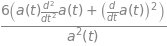

In [68]:
R_scalar_24 = RicciScalar.from_metric(metric_24)
R_scalar_24.simplify()
R_scalar_24.expr

# EinsteinTensor ($G_{\mu\nu}$)

In [69]:
einst_24 = EinsteinTensor.from_metric(metric_24)
einst_24.tensor()

⎡    ⎛       2                   2⎞       2                                   
⎢    ⎜      d          ⎛d       ⎞ ⎟      d                                    
⎢3.0⋅⎜a(t)⋅───(a(t)) + ⎜──(a(t))⎟ ⎟   3⋅───(a(t))                             
⎢    ⎜       2         ⎝dt      ⎠ ⎟       2                                   
⎢    ⎝     dt                     ⎠     dt                                    
⎢────────────────────────────────── - ───────────                  0          
⎢               2                         a(t)                                
⎢              a (t)                                                          
⎢                                                                             
⎢                                                               2             
⎢                                                              d          ⎛d  
⎢                       0                          - 2.0⋅a(t)⋅───(a(t)) - ⎜──(
⎢                                                   

In [70]:
for i, j in product(range(4), range(4)):
    if einst_24[i, j] != 0:
        display(Math(f'G_{{{i}{j}}} = ' + latex(einst_24[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Stress Energy Momentum Tensor ($T_{\mu\nu}$)

In [71]:
T_24 = StressEnergyMomentumTensor.from_metric(metric_24)
T_24.tensor()

⎡                      ⎛        ⎛       2                   2⎞       2      ⎞ 
⎢                      ⎜        ⎜      d          ⎛d       ⎞ ⎟      d       ⎟ 
⎢                      ⎜    3.0⋅⎜a(t)⋅───(a(t)) + ⎜──(a(t))⎟ ⎟   3⋅───(a(t))⎟ 
⎢                      ⎜        ⎜       2         ⎝dt      ⎠ ⎟       2      ⎟ 
⎢                    4 ⎜        ⎝     dt                     ⎠     dt       ⎟ 
⎢0.0397887357729738⋅c ⋅⎜Λ + ────────────────────────────────── - ───────────⎟ 
⎢                      ⎜                   2                         a(t)   ⎟ 
⎢                      ⎝                  a (t)                             ⎠ 
⎢──────────────────────────────────────────────────────────────────────────── 
⎢                                     G                                       
⎢                                                                             
⎢                                                                             
⎢                                                   

In [72]:
for i, j in product(range(4), range(4)):
    if T_24[i, j] != 0:
        display(Math(f'T_{{{i}{j}}} = ' + latex(T_24[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Let's try to get EFE